In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

import plot_analysis_result as plot
import importlib
import glob
importlib.reload(plot)
input_folder = '/gladstone/engelhardt/lab/hvu/RNA_rates/solver_analysis/constant/after_Smooth/question_4'
output_folder = '/gladstone/engelhardt/lab/hvu/RNA_rates/solver_analysis/constant/after_Smooth/question_4'
fn_list = glob.glob(f'{input_folder}/result_*.txt.gz')
os.makedirs(output_folder, exist_ok=True)
import importlib
importlib.reload(plot)
result_df = plot.read_all_result_files(input_folder, methods=['simpleSmooth', 'simpleSolver'])

       N     G  time_traverse_gene  label_time  vary_bin_kb  vary_fold  h_bin  \
0  27000  27.0                27.0           5          1.0      0.001    0.1   
1  27000  27.0                27.0           5          1.0      0.001    0.1   
2  27000  27.0                27.0           5          1.0      0.001    0.1   
3  27000  27.0                27.0           5          1.0      0.001    0.5   
4  27000  27.0                27.0           5          1.0      0.001    0.5   

   lambda_smooth                                          elongf_fn  \
0            0.1  /gladstone/engelhardt/lab/hvu/RNA_rates/solver...   
1            0.5  /gladstone/engelhardt/lab/hvu/RNA_rates/solver...   
2            1.0  /gladstone/engelhardt/lab/hvu/RNA_rates/solver...   
3            0.1  /gladstone/engelhardt/lab/hvu/RNA_rates/solver...   
4            0.5  /gladstone/engelhardt/lab/hvu/RNA_rates/solver...   

                                           output_fn  wMSE_simpleSmooth  \
0  /gladsto

In [2]:
# plot5: Compare the performance of different solvers, across different true_h for only one case:
import importlib
importlib.reload(plot)
def read_one_result_raw(fn, summ_df, methods = ['simpleSolver', 'simpleSmooth', 'bayesLinearSolver', 'bayesRBFSolver', 'logNormalSolver']):
    '''
    Read one result file and return the results as a dictionary
    :param fn: str, the filename
    :return: dict
    '''
    df = pd.read_csv(fn, sep='\t', header=0, index_col=None)  # start, end, true_h and then all the diffemrent solver results
    file_index = int(fn.split('/')[-1].split('.')[0].split('_')[-1])
    try:
        df = df.rename(columns={'txrate': 'true_h'})
    except:
        pass
    h_bin =summ_df.loc[file_index, 'h_bin']
    lambda_smooth = summ_df.loc[file_index, 'lambda_smooth']
    vary_fold = summ_df.loc[file_index, 'vary_fold']
    df['h_bin'] = h_bin
    df['lambda_smooth'] = lambda_smooth
    df['vary_fold'] = vary_fold
    return df

run_fn_list = [f'{input_folder}/result_{i}.txt.gz' for i in range(len(fn_list))]
run_df_list = list(map(lambda x: read_one_result_raw(x, result_df, methods = ['simpleSmooth', 'simpleSolver']), run_fn_list))
run_df = pd.concat(run_df_list)

['0.1' '0.5' '1.0']
{'simpleSolver_0.1': <matplotlib.lines.Line2D object at 0x7f40be6abd50>, 'simpleSmooth_0.1': <matplotlib.lines.Line2D object at 0x7f40be32d290>, 'simpleSolver_0.5': <matplotlib.lines.Line2D object at 0x7f40be31b090>, 'simpleSmooth_0.5': <matplotlib.lines.Line2D object at 0x7f40be32d2d0>, 'simpleSolver_1.0': <matplotlib.lines.Line2D object at 0x7f40be350fd0>, 'simpleSmooth_1.0': <matplotlib.lines.Line2D object at 0x7f40be351a50>, 'true_h_0.1': <matplotlib.lines.Line2D object at 0x7f40be352450>}


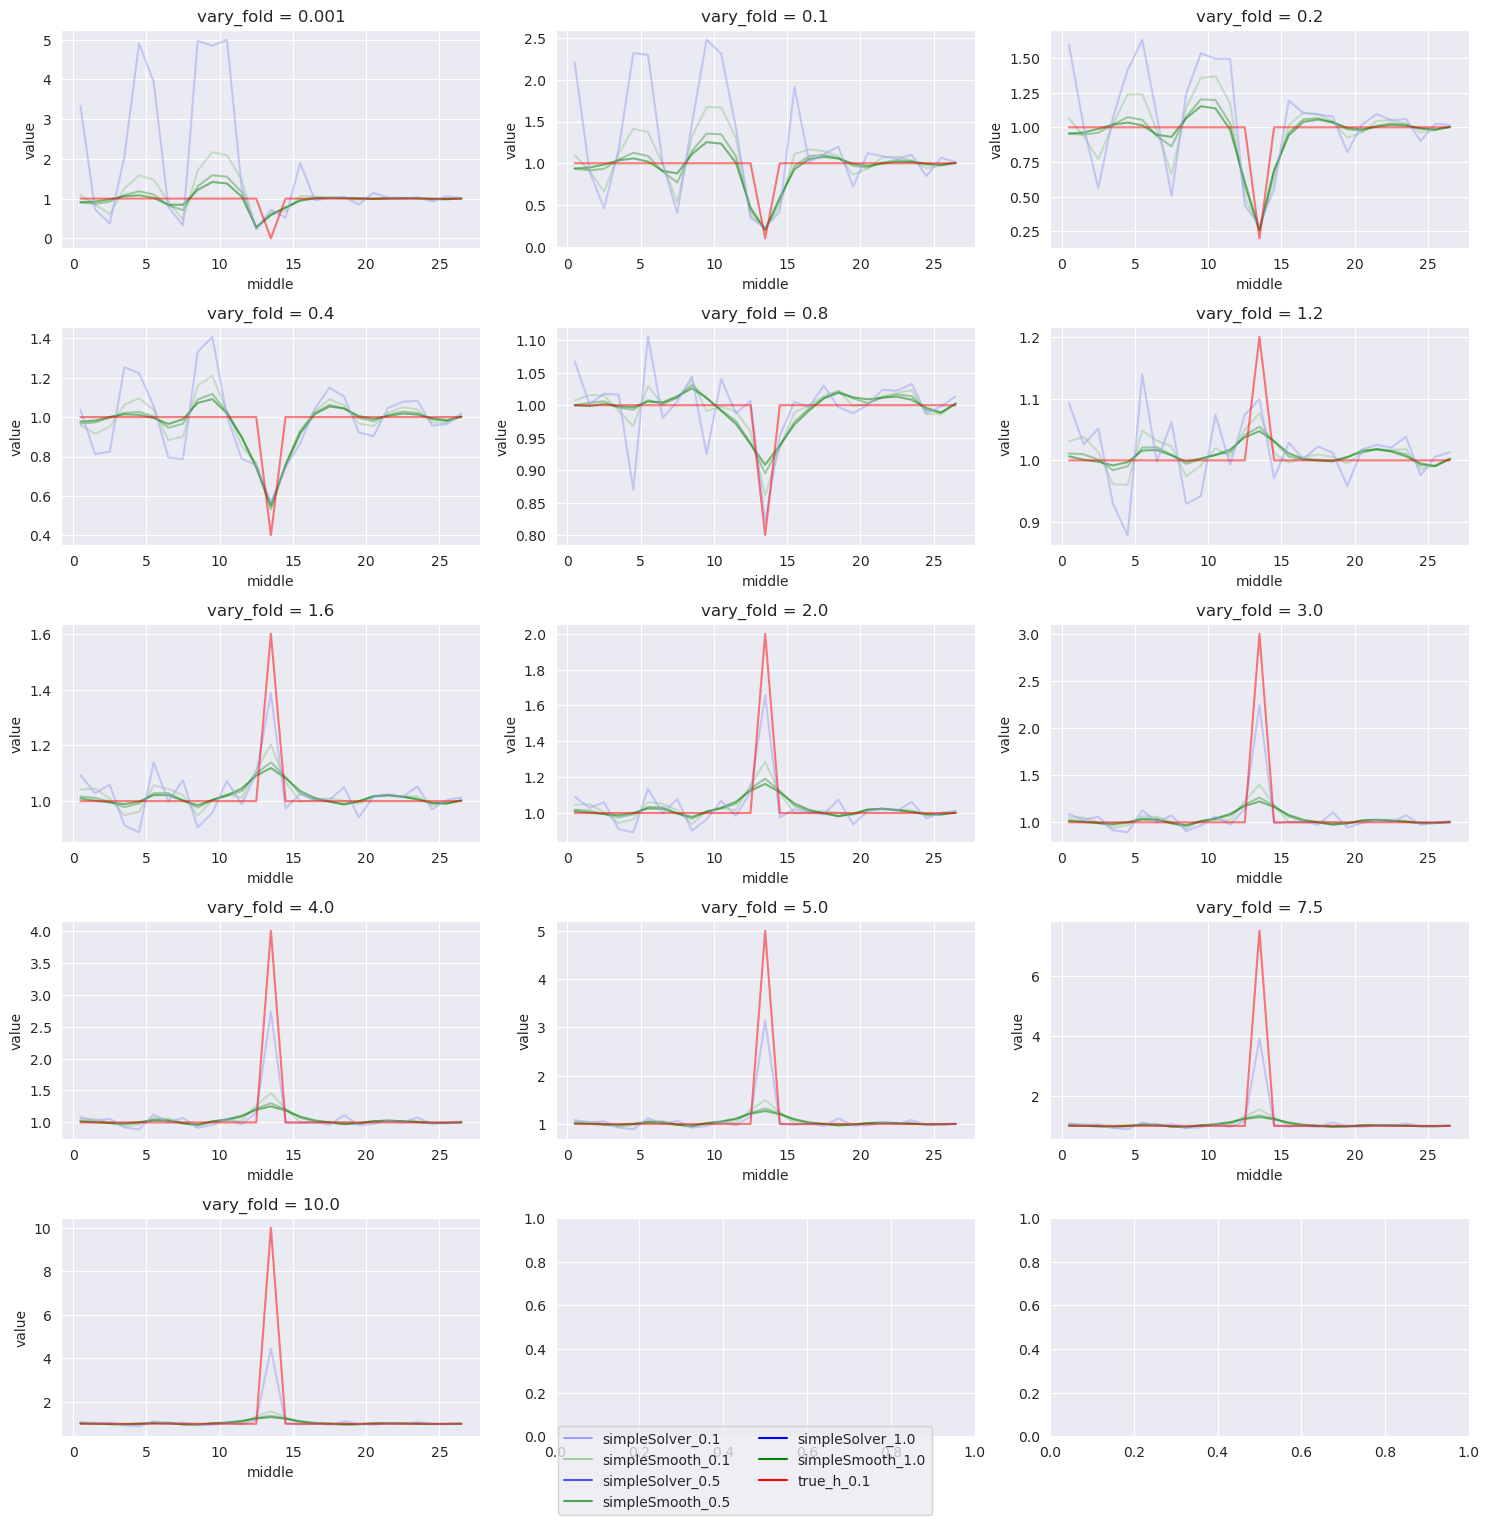

(<Figure size 1500x1500 with 15 Axes>,
 array([[<Axes: title={'center': 'vary_fold = 0.001'}, xlabel='middle', ylabel='value'>,
         <Axes: title={'center': 'vary_fold = 0.1'}, xlabel='middle', ylabel='value'>,
         <Axes: title={'center': 'vary_fold = 0.2'}, xlabel='middle', ylabel='value'>],
        [<Axes: title={'center': 'vary_fold = 0.4'}, xlabel='middle', ylabel='value'>,
         <Axes: title={'center': 'vary_fold = 0.8'}, xlabel='middle', ylabel='value'>,
         <Axes: title={'center': 'vary_fold = 1.2'}, xlabel='middle', ylabel='value'>],
        [<Axes: title={'center': 'vary_fold = 1.6'}, xlabel='middle', ylabel='value'>,
         <Axes: title={'center': 'vary_fold = 2.0'}, xlabel='middle', ylabel='value'>,
         <Axes: title={'center': 'vary_fold = 3.0'}, xlabel='middle', ylabel='value'>],
        [<Axes: title={'center': 'vary_fold = 4.0'}, xlabel='middle', ylabel='value'>,
         <Axes: title={'center': 'vary_fold = 5.0'}, xlabel='middle', ylabel='value'>,

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def question2_plot1(run_df, bin_h = 0.1, methods=['simpleSmooth', 'simpleSolver'], save_fn=None):
    '''
    There are 13 subplots corresponding to 13 different vary_fold.
    For each subplot:
    - x-axis: avg of start and end
    - y-axis: simpleSmooth and simpleSolver predictions, along with true_h 
    (there should be num bin_h * 2 + 1 lines) 
    (2 methods, each has num bin_h variations, and 1 line for true_h)
    '''
    plot_df = run_df[run_df['h_bin'] == bin_h].copy()
    vary_fold_list = plot_df['vary_fold'].unique()
    fig, axs = plt.subplots(5, 3, figsize=(15, 15))
    # Define custom colors for each method_binH
    uniq_lambda = plot_df['lambda_smooth'].astype(str).unique()
    print(uniq_lambda)
    # Assign colors to method_binH combinations
    blue_palette = sns.light_palette("blue", reverse=False, n_colors=len(uniq_lambda)+1)
    green_palette = sns.light_palette("green", reverse=False, n_colors=len(uniq_lambda)+1)
    red_color = "red"
    color_dict = {}
    for l_idx, lambda_smooth in enumerate(uniq_lambda):
        color_dict[f'simpleSolver_{lambda_smooth}'] = blue_palette[l_idx+1]  # Map to blue shades
        color_dict[f'simpleSmooth_{lambda_smooth}'] = green_palette[l_idx+1]  # Map to green shades
    color_dict['true_h_0.1'] = red_color
    
    handles_labels = {} # To store legend handles and labels
    for i, vary_fold in enumerate(vary_fold_list):
        ax = axs[i // 3, i % 3]
        sub_df = plot_df[plot_df['vary_fold'] == vary_fold].copy()
        sub_df['middle'] = (sub_df['start'] + sub_df['end']) / 2
        melt_df = pd.melt(
            sub_df,
            id_vars=['middle', 'lambda_smooth'],
            value_vars=methods + ['true_h'],
            var_name='method',
            value_name='value'
        )
        # Filter rows where true_h has non-default h_bin
        melt_df = melt_df[~((melt_df['method'] == 'true_h') & (melt_df['lambda_smooth'] != 0.1))]
        melt_df = melt_df[~((melt_df['method'] == 'simpleSolver') & (melt_df['lambda_smooth'] != 0.1))]
        melt_df['method_lambda'] = melt_df['method'] + '_' + melt_df['lambda_smooth'].astype(str)
        sns.lineplot(
            x='middle', y='value', hue='method_lambda', data=melt_df, ax=ax,
            palette=color_dict, legend=False, alpha= 0.5
        )
        ax.set_title(f'vary_fold = {vary_fold}')
        
        for method_binH, color in color_dict.items():
            handles_labels[method_binH], = ax.plot([], [], label=method_binH, color=color)
    # Filter out duplicates for the shared legend
    print(handles_labels)
    fig.legend(handles_labels.values(), handles_labels.keys(), loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=2)
    plt.tight_layout()
    if save_fn:
        plt.savefig(save_fn)
    plt.show()
    return fig, axs

# question2_plot1(run_df, save_fn = f'{output_folder}/question4_plot1.png', bin_h = 0.1)
# question2_plot1(run_df, save_fn = f'{output_folder}/question4_plot2.png', bin_h = 0.5)
question2_plot1(run_df, save_fn = f'{output_folder}/question4_plot3.png', bin_h = 1)

/tmp/ipykernel_4077775/3803450237.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  plot_df = plot_df.groupby(['vary_fold', 'lambda_smooth']).apply(lambda x: np.corrcoef(x['true_h'], x['simpleSmooth'])[0, 1]).reset_index()


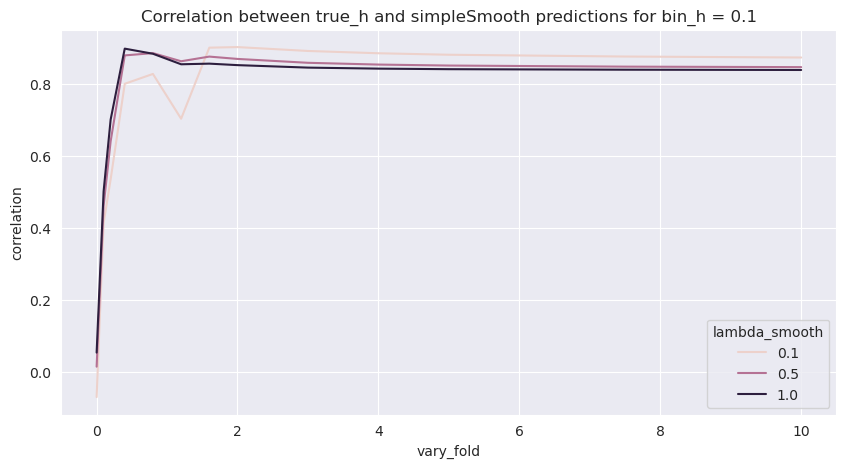

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'Correlation between true_h and simpleSmooth predictions for bin_h = 0.1'}, xlabel='vary_fold', ylabel='correlation'>)

In [3]:
def question4_plot3(run_df, bin_h = 1, methods=['simpleSmooth', 'simpleSolver'], save_fn=None):
    '''
    - Filter such that we only care about predictions at start >= 12 and end <= 14
    - For each vary_fold and each method, calculate the correlation between the true_h and the prediction
    - Plot: 
        - x-axis: vary_fold
        - y-axis: correlation
        - Each method (simplesmooth with differtent lambda values) has a different color
    :param run_df: 
    :param bin_h: 
    :param methods: 
    :param save_fn: 
    :return: 
    '''
    plot_df = run_df[run_df['h_bin'] == bin_h].copy()
    plot_df = plot_df[(plot_df['start'] >= 12) & (plot_df['end'] <= 14)]
    plot_df = plot_df.groupby(['vary_fold', 'lambda_smooth']).apply(lambda x: np.corrcoef(x['true_h'], x['simpleSmooth'])[0, 1]).reset_index()
    plot_df.columns = ['vary_fold', 'lambda_smooth', 'correlation']
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.lineplot(x='vary_fold', y='correlation', hue='lambda_smooth', data=plot_df, ax=ax)
    ax.set_title(f'Correlation between true_h and simpleSmooth predictions for bin_h = {bin_h}')
    if save_fn:
        plt.savefig(save_fn)
    plt.show()
    return fig, ax

question4_plot3(run_df, save_fn = f'{output_folder}/question4_plot3.png', bin_h = 0.1)
    
    